<a href="https://colab.research.google.com/github/Vallepalli3515/1002203515-daa-handson-6/blob/main/1002203515_DAA_Handson_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

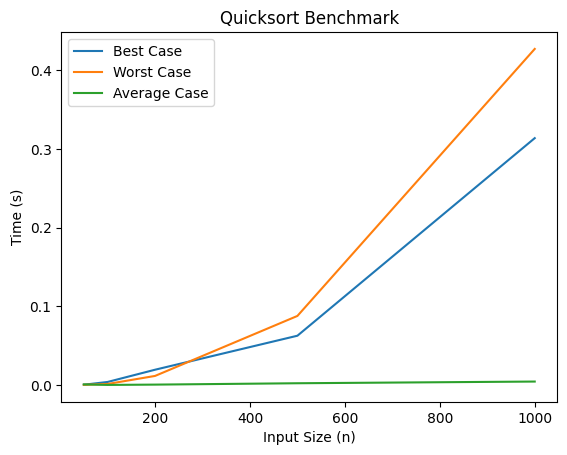

In [2]:
import random
import timeit
import matplotlib.pyplot as plt

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    j = low
    while j < high:
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
        j += 1
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

def quicksort(arr):
    stack = [(0, len(arr) - 1)]
    while stack:
        low, high = stack.pop()
        while low < high:
            pi = partition(arr, low, high)
            if pi - low < high - pi:
                stack.append((low, pi - 1))
                low = pi + 1
            else:
                stack.append((pi + 1, high))
                high = pi - 1

def quicksort_random_pivot(arr):
    random.shuffle(arr)
    quicksort(arr)

def generate_best_case_input(n):
    return [i for i in range(n)]

def generate_worst_case_input(n):
    return [i for i in range(n, 0, -1)]

def generate_average_case_input(n):
    return [random.randint(0, 1000) for _ in range(n)]

def benchmark_sorting_function(sort_func, input_generator, sizes, repetitions=3):
    times = []
    for size in sizes:
        total_time = 0
        for _ in range(repetitions):
            arr = input_generator(size)
            start_time = timeit.default_timer()
            sort_func(arr)
            end_time = timeit.default_timer()
            total_time += end_time - start_time
        avg_time = total_time / repetitions
        times.append(avg_time)
    return times

if __name__ == "__main__":
    sizes = [50, 100, 200, 500, 1000]

    # Benchmarking best case
    best_case_times = benchmark_sorting_function(quicksort, generate_best_case_input, sizes)

    # Benchmarking worst case
    worst_case_times = benchmark_sorting_function(quicksort, generate_worst_case_input, sizes)

    # Benchmarking average case
    average_case_times = benchmark_sorting_function(quicksort, generate_average_case_input, sizes)

    plt.plot(sizes, best_case_times, label='Best Case')
    plt.plot(sizes, worst_case_times, label='Worst Case')
    plt.plot(sizes, average_case_times, label='Average Case')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (s)')
    plt.title('Quicksort Benchmark')
    plt.legend()
    plt.show()